<a href="https://colab.research.google.com/github/albgavm/Heart-Attack/blob/main/Heart_Attack_Albert_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
url = "https://raw.githubusercontent.com/albgavm/Heart-Attack/main/heart.csv"


In [49]:

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling as pp

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [13]:
heartattack_csv = pd.read_csv(url)

In [14]:
heartattack_csv.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
heartattack_csv.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
heartattack_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
heartattack_csv.isnull().sum()
#no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [22]:
heartattack_csv.shape

(303, 14)

In [29]:
heartattack_csv.describe().T.style.bar(
    subset=['mean'],
    color='Reds').background_gradient(subset=['std'],cmap='ocean').background_gradient(subset=['50%'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


## Practice Data Visualizations

In [47]:

def visualization (hues,data,features,labels):
  labels.value_counts().plot.pie();
  plt.show()
  sns.countplot(x=hues,data=data,palette='viridis');
  plt.show()
  print("\n\n\n")

  def boxplot(columns,data):
    fig = px.box(data,x=data[column], color=hues)
    fig.show()
  for column in features:
    boxplot(column,data)

  print("\n\n\n")

  def hist_count(column, data):
    if column in data:
      f, axes = plt.subplots(1,1,figsize = (15,5))
      sns.countplot(x=column,data=data)
      plt.xticks(rotation=90)
      plt.suptitle(column, fontsize=20)
      plt.show()
    plt.show()

    for column in df.columns:
        hist_count(column,df)
  print("\n\n\n")

  def boxdistriplot(columnName):
    if not columnName == hues:
      sns.distplot(data[columnName][labels==1], color = 'darkturquoise', rug=True)
      sns.distplot(data[columnName][labels==0], color = 'lightcoral', rug=True);
      plt.show()
  for column in data.columns:
    boxdistriplot(column)

  print("\n\n\n")

  def correlation_pairplots(data):
    plt.figure(figsize=(15,15))
    sns.heatmap(data.corr(),annot = True, cmap = 'Blues')
    plt.show()
  correlation_pairplots(data)

    
    




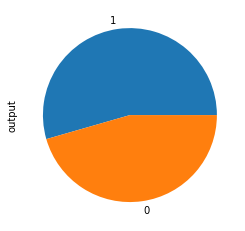

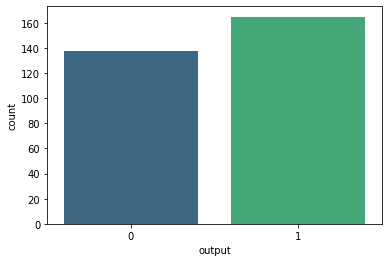

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

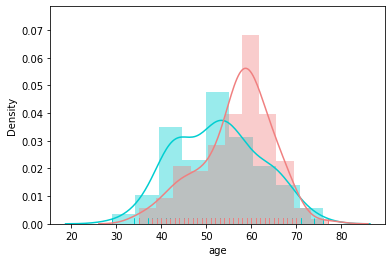

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

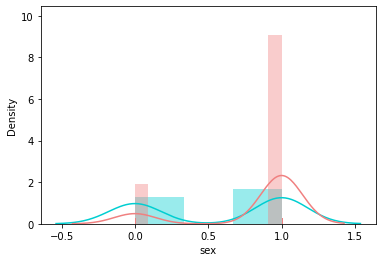

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

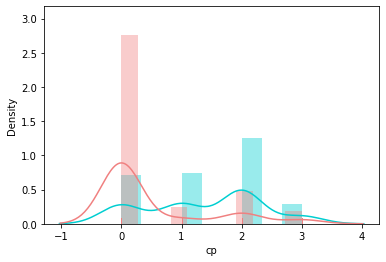

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

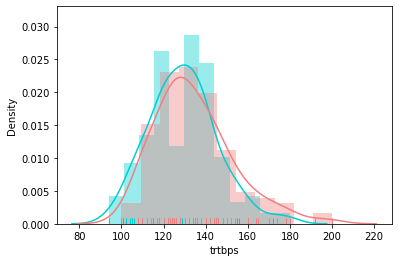

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

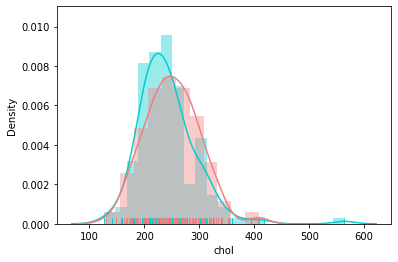

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

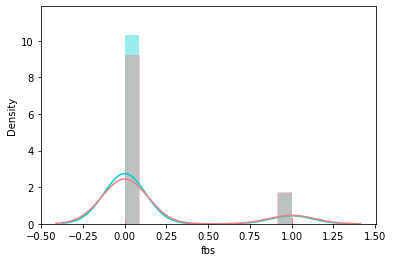

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

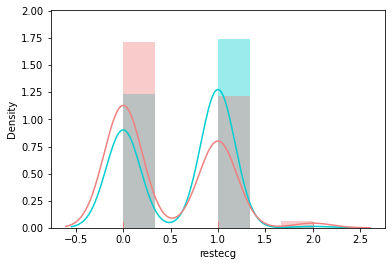

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

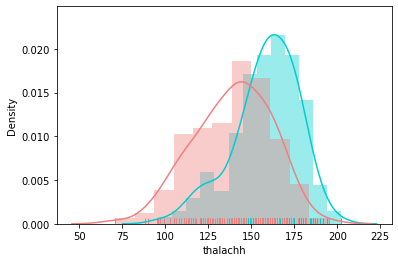

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

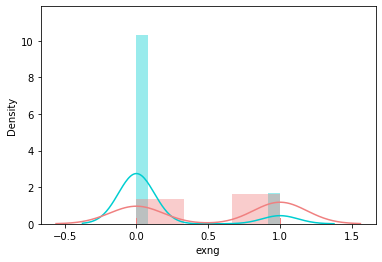

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

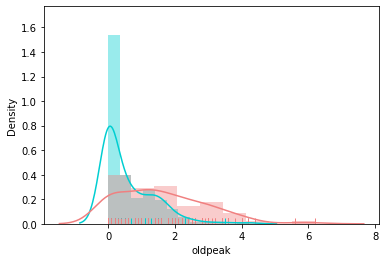

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

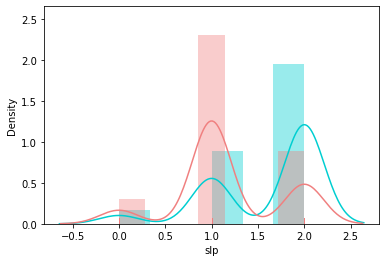

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

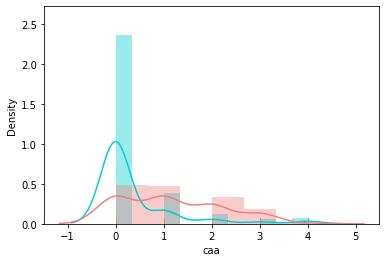

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

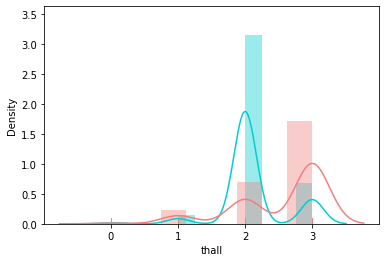

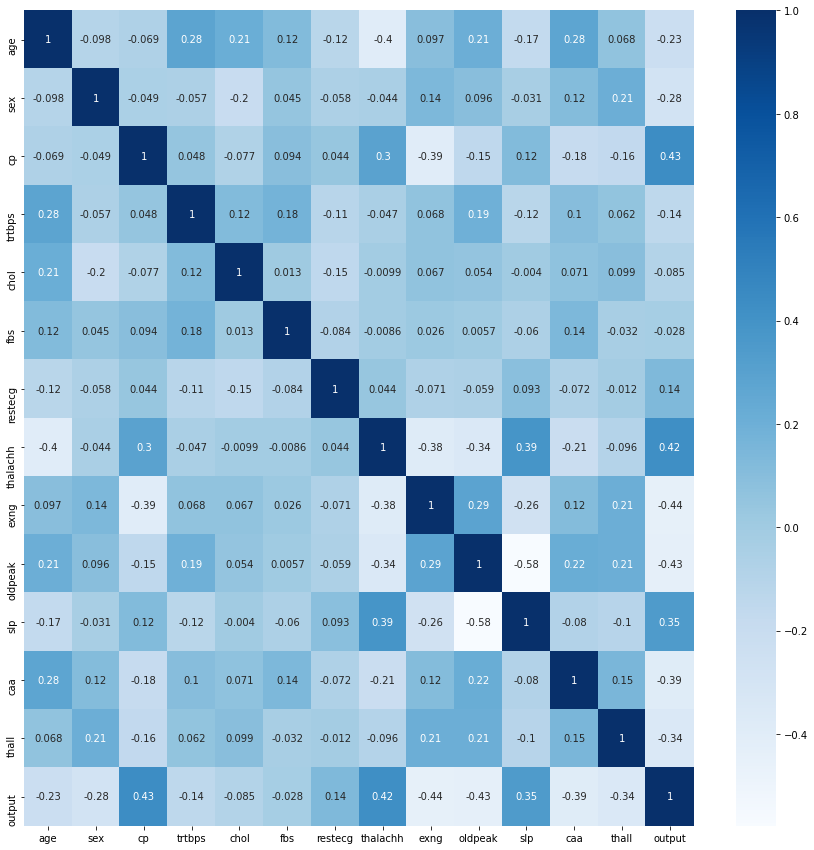

In [48]:
col=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

visualization('output',heartattack_csv,heartattack_csv[col],heartattack_csv['output'])

In [59]:
def preprocessing(data,features,labels,test_size = 0.2,random_state =42, tune = 'n',cv_folds = 5):
    
    print('Checking if labels or features are categorical! [*]\n')
    cat_features=[i for i in features.columns if features.dtypes[i]=='object']
    if len(cat_features) >= 1 :
        index = []
        for i in range(0,len(cat_features)):
            index.append(features.columns.get_loc(cat_features[i]))
        print('Features are Categorical\n')
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), index)], remainder='passthrough')
        print('Encoding Features [*]\n')
        features = np.array(ct.fit_transform(features))
        print('Encoding Features Done [',u'\u2713',']\n')
    if labels.dtype == 'O':
        le = LabelEncoder()
        print('Labels are Categorical [*] \n')
        print('Encoding Labels \n')
        labels = le.fit_transform(labels)
        print('Encoding Labels Done [',u'\u2713',']\n')
    else:
        print('Features and labels are not categorical [',u'\u2713',']\n')
        
    ## SMOTE ---------------------------------------------------------------------
    print('Applying SMOTE [*]\n')
    
    sm=SMOTE(k_neighbors=4)
    features,labels=sm.fit_resample(features,labels)
    print('SMOTE Done [',u'\u2713',']\n')
    
    ## Splitting ---------------------------------------------------------------------
    print('Splitting Data into Train and Validation Sets [*]\n')
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size= test_size, random_state= random_state)
    print('Splitting Done [',u'\u2713',']\n')
    
    ## Scaling ---------------------------------------------------------------------
    print('Scaling Training and Test Sets [*]\n')
    
    sc = StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_val = sc.transform(x_test)
    print('Scaling Done [',u'\u2713',']\n')
    
    print('Training All Basic Classifiers on Training Set [*] \n')
    
    parameters_svm= [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9, 1],
        'C': np.logspace(-4, 4, 5)},
    ]
    parameters_lin = [{
    'penalty': ['l1', 'l2', ],
    'solver': ['newton-cg', 'liblinear', ],
    'C': np.logspace(-4, 4, 5),
    }]
    parameters_knn = [{
    'n_neighbors': list(range(0, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    }]
    parameters_dt = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,  6,  8,  10,  12,  20,  40, 70],

    }]
    parameters_rfc = [{
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_features': [2, 3],
    }]
    parameters_xgb = [{
    'max_depth': [4,  6,  8,  10],
    'learning_rate': [0.3, 0.1],
    }]
    parameters_lgbm =  {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    }
    paramters_pac = {
        'C': np.logspace(-4, 4, 20)},
    
    
    param_nb={}
    parameters_ada={
            'learning_rate': [0.005, 0.01],
            'n_estimators': [8,16,24],
    }
    paramters_sgdc = [{
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log'],
    'alpha':np.logspace(-4, 4, 20),
    }]
    models =[("LR", LogisticRegression(), parameters_lin),("SVC", SVC(),parameters_svm),('KNN',KNeighborsClassifier(),parameters_knn),
    ("DTC", DecisionTreeClassifier(),parameters_dt),("GNB", GaussianNB(), param_nb),("SGDC", SGDClassifier(), paramters_sgdc),('RF',RandomForestClassifier(),parameters_rfc),
    ('ADA',AdaBoostClassifier(),parameters_ada),('XGB',GradientBoostingClassifier(),parameters_xgb),('LGBN', LGBMClassifier(),parameters_lgbm),
    ('PAC',PassiveAggressiveClassifier(),paramters_pac)]

    results = []
    names = []
    finalResults = []
    accres = []

    for name,model, param in models:
        
        model.fit(x_train, y_train)
        model_results = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_results)
        print('Validation Accuracy is :',accuracy)
        print('Applying K-Fold Cross validation on Model {}[*]'.format(name))
        accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=cv_folds, scoring='accuracy')
        print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
        acc = accuracies.mean()*100
        print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 
        results.append(acc)
        names.append(name)
        accres.append((name,acc))
        if tune == 'y' and not name == 'GNB':
            print('Applying Grid Search Cross validation for model {} []\n'.format(name))
            cv_params = param
            grid_search = GridSearchCV(
            estimator=model,
            param_grid=cv_params,
            scoring='accuracy',
            cv=cv_folds,
            n_jobs=-1,
            verbose=4,
                )
            grid_search.fit(X_train, y_train)
            best_accuracy = grid_search.best_score_
            best_parameters = grid_search.best_params_
            print("Best Accuracy for model {}: {:.2f} %".format(name,best_accuracy*100))
            print("Best Parameters: for model {}".format(name), best_parameters)
            print('Applying Grid Search Cross validation Done[',u'\u2713',']\n')
            
        print('Training Compeleted Showing Predictions [',u'\u2713','] \n')
    accres.sort(key=lambda k:k[1],reverse=True)
    print("\n The Accuracy of the Models Are:\n ")
    tab = pd.DataFrame(accres)
    print(tab)
    sns.barplot(x=tab[1], y=tab[0], palette='mako');
    print("\n\nModel With Highest Accuracy is: \n",accres[0],'\n\n')


In [62]:
# Getting Features
col = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']
x = heartattack_csv[col]
# Getting Predicting Value
y = heartattack_csv['output']

In [69]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from collections import Counter
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.svm import SVC
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Basic Classifiers on Training Set [*] 

Validation Accuracy is : 0.8333333333333334
Applying K-Fold Cross validation on Model LR[*]
Accuracy: 85.22 %
Standard Deviation: 3.86 %
Training Compeleted Showing Predictions [ ✓ ] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

Validation Accuracy is : 0.6515151515151515
Applying K-Fold Cross validation on Model SVC[*]
Accuracy: 71.57 %
Standard Deviation: 2.85 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.6212121212121212
Applying K-Fold Cross validation on Model KNN[*]
Accuracy: 69.71 %
Standard Deviation: 4.54 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.803030303030303
Applying K-Fold Cross validation on Model DTC[*]
Accuracy: 75.38 %
Standard Deviation: 3.33 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.8333333333333334
Applying K-Fold Cross validation on Model GNB[*]
Accuracy: 83.68 %
Standard Deviation: 6.28 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.5
Applying K-Fold Cross validation on Model SGDC[*]
Accuracy: 60.25 %
Standard Deviation: 10.45 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.8484848484848485
Applying K-Fold Cross validation on Mode

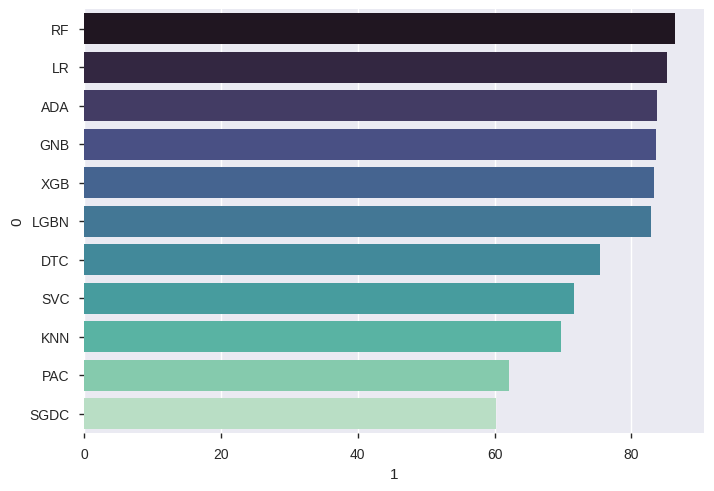

In [70]:
preprocessing(heartattack_csv, x , y)